In [440]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [441]:
pixel_size_cal = 0.503 # obtained from attractor calibration data February2020, but cross checked during Wilson itself

In [442]:
bead_date =20200614
bead_number = 1

In [443]:
# get the attractor 0 position
image_folder = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number + "HeightPictures/"
images = load_img_files(image_folder+"*")


/data/new_trap/20200614/Bead1/HeightPictures/shadow_when_approaching.bmp 0
/data/new_trap/20200614/Bead1/HeightPictures/shield_bead.bmp 1
/data/new_trap/20200614/Bead1/HeightPictures/gold_finger.bmp 2
/data/new_trap/20200614/Bead1/HeightPictures/bead_only_filter_and_handle_in.bmp 3
/data/new_trap/20200614/Bead1/HeightPictures/sillicon_finger.bmp 4
/data/new_trap/20200614/Bead1/HeightPictures/image_during_long_z.bmp 5
/data/new_trap/20200614/Bead1/HeightPictures/shield_bead_2.bmp 6
/data/new_trap/20200614/Bead1/HeightPictures/4dB.bmp 7
/data/new_trap/20200614/Bead1/HeightPictures/5dB.bmp 8
/data/new_trap/20200614/Bead1/HeightPictures/6dB.bmp 9
/data/new_trap/20200614/Bead1/HeightPictures/5.5dB.bmp 10
/data/new_trap/20200614/Bead1/HeightPictures/shield_x_100mV.bmp 11
/data/new_trap/20200614/Bead1/HeightPictures/shield_x_200mV.bmp 12
/data/new_trap/20200614/Bead1/HeightPictures/shield_x_500mV.bmp 13
/data/new_trap/20200614/Bead1/HeightPictures/shield_x_600mV.bmp 14
/data/new_trap/20200614

In [444]:
attractor_0 = 240.28220914390585 # from notebook Attractor_Height_Analysis_Chadwick


In [445]:
# load the image files
dataset = "/Shaking/Shaking367/"
FOI = "SpinShaking4"
filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/" + FOI
data = load_npy_files(path=filename+"*",max_files=10000)

/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_0.npy 0
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_1.npy 1
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_2.npy 2
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_3.npy 3
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_4.npy 4
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_5.npy 5
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_6.npy 6
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_7.npy 7
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_8.npy 8
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_9.npy 9
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_10.npy 10
/data/new_trap/20200614/Bead1//Shaking/Shaking367/Pictures_0/SpinShaking4_11.npy 11
/data/new_tr

In [411]:
for y in np.arange(150,250,5):
    height = [] # get the height using the shadow method
    width = []
    factor_std=2
    for i in range(100):#tqdm(range(len(data))):
        mean, m = from_shadow_image_to_height(data[i],y,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
        #mean2,m2 = from_shadow_image_to_width(data[i],190,area_low_limits=[650,730],area_width=70,plot=False)
        height.append(pixel_to_height(mean,calibration=True,pix_size_from_calib=pixel_size_cal))
        width.append(m.values["sigma"])
    #    width.append(mean2)
    print(y,np.mean(height),np.std(height))
    print(np.mean(width))
    print(len([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]))
        #plt.show()

150 279.53844322378944 0.21463464969537271
2.915150627118873
95
155 279.4928941403107 0.229121279574623
3.0624383411810534
97
160 279.4294209473511 0.25039054346347134
3.2408882473112777
97
165 279.3300954765325 0.29853727530298346
3.456508619958378
98
170 279.2013033156237 0.40548268021678036
3.7023764070703735
99
175 278.86185425500264 0.6746371685129173
4.104089643220612
100
180 277.16760526167286 4.621205700112512
4.222541323081653
90
185 273.5963176253057 7.5894376640733805
4.275673952143886
100
190 274.9516800096225 5.9105089611669985
4.350626971261986
90
195 276.439543945601 3.7925802258956387
4.416567353645443
99
200 277.21858306514343 2.5919734581498903
4.537299698802643
99
205 278.0527820777402 1.519510829641017
4.5841911796138985
93
210 278.425410996703 1.1805150241713733
4.714732018631784
99
215 278.56960167623356 1.1385791688634308
4.674226231972542
98
220 278.70661025297807 0.9097698803424542
4.659727927645488
98
225 278.9082282407035 0.7203652280721864
4.564540977877289


In [446]:
height = [] # get the height using the shadow method
width = []
for i in tqdm(range(len(data))):
    mean, m = from_shadow_image_to_height(data[i],165,area_low_limits=[650,730],area_widths=[45,70],plot=False,width_max=10,flb=440)
    mean2,m2 = from_shadow_image_to_width(data[i],165,area_low_limits=[650,730],area_width=70,plot=False)
    height.append(pixel_to_height(mean,calibration=True,pix_size_from_calib=pixel_size_cal))
    width.append(mean2)
    #plt.show()



100%|██████████| 4000/4000 [01:49<00:00, 35.16it/s]

In [447]:
df = pd.DataFrame() # create the dataframe

In [448]:
factor_std = 1.5 # pick the sigma away from the mean used for the correction of outlier
df["height_raw"] = height # just the fit result
df["y_pos_raw"] = width
df["mean_height"] = [x if np.abs(x-np.mean(height))<(factor_std*np.std(height)) else np.mean(height) for x in height] # bring outlier to the mean

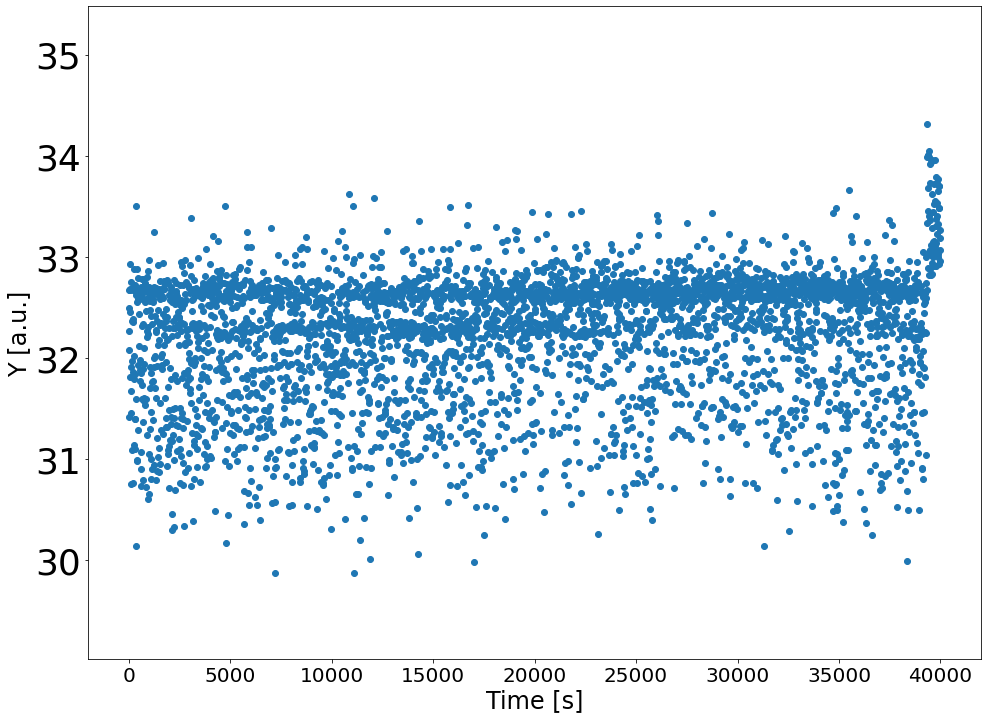

3803


In [449]:
plt.plot(np.arange(0,len(width)*10,10),width,linestyle="",marker="o")
plt.xlabel("Time [s]")
plt.ylabel("Y [a.u.]")
plt.ylim(np.mean(width)-1/10*np.mean(width),np.mean(width)+1/10*np.mean(width))
plt.show()
print(len([x for x in width if np.abs(x-np.mean(width))<(factor_std*np.std(width))]))

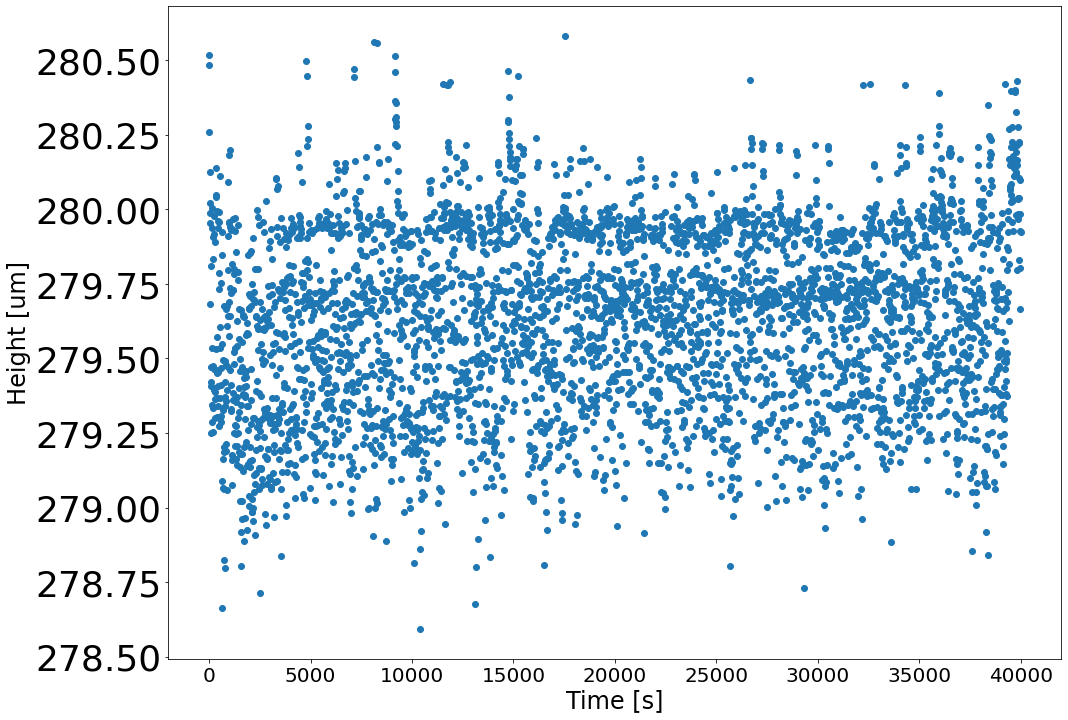

279.63279762418847 0.30639287362669276
279.64379765323145 0.24056184759014382
3488


In [450]:
plt.plot(np.arange(0,len(height)*10,10),height,linestyle="",marker="o")
plt.xlabel("Time [s]")
plt.ylabel("Height [um]")
#plt.xlim(1500)
#plt.ylim(275,)
#plt.xlim(25520,30000)
plt.show()
print(np.mean(height),np.std(height))
print(np.mean([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]),np.std([x for x in height if np.abs(x-np.mean(height))<factor_std*np.std(height)]))
print(len([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]))

In [451]:
df['ewm_20'] = df.mean_height.ewm(span=20, adjust=True).mean() # do the exponential weighted mean over 20 files
df['ewm_100'] = df.mean_height.ewm(span=100, adjust=True).mean() # do the exponential weighted mean over 100 files
df['ewm_500'] = df.mean_height.ewm(span=500, adjust=True).mean() # do the exponential weighted mean over 500 files


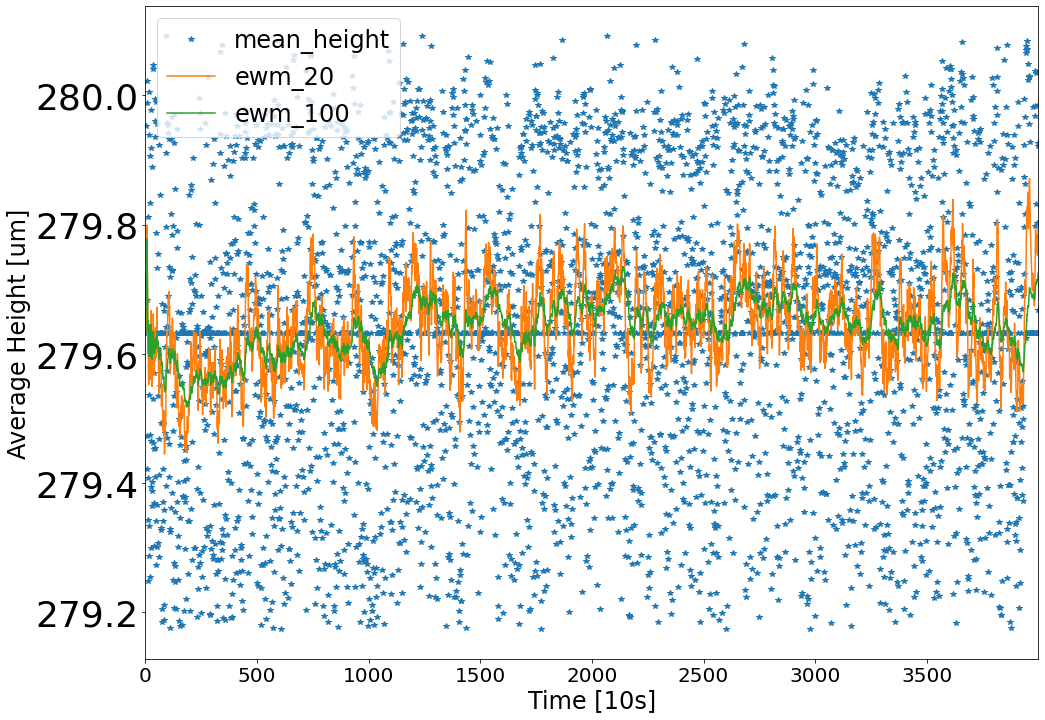

In [452]:
df.mean_height.plot(marker="*",linestyle="")#), label = "height-filtered data")
df.ewm_20.plot()#, label = "20 datasets EWM")
df.ewm_100.plot()#, label = "100 datasets EWM")
plt.xlabel("Time [10s]")
plt.ylabel("Average Height [um]")
plt.legend()
plt.show()

In [453]:
# load the attractor mean position for the data file
data_filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
attr_pos = load_dir_reduced_to_attr_pos(dirname=data_filename,file_prefix=FOI,max_files=10000)



100%|██████████| 100/100 [04:27<00:00,  2.68s/it]

In [454]:
# load the time frame from all the data sets in 100er chunks to not flood the memory (could be parallelized)
t = load_dir_reduced_to_time(dirname=data_filename,file_prefix=FOI,max_files=10000)




100%|██████████| 100/100 [00:19<00:00,  5.01it/s]

In [455]:
df["Time_Epoch"] = t # store the time
df["Attr_Pos_V"] = np.divide(attr_pos,1) # save raw position

del t # free some memory, otherwise bunnies die
del attr_pos # free more memory


------------------------------------------------------------------
| FCN = 2.381E-13               |      Ncalls=35 (35 total)      |
| EDM = 2.38E-13 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.09904999993134567 -0.00499999621661118


/home/analysis_user/New_trap_code/Tools/analysis_tools.py:97: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  print_level=1)
/home/analysis_user/New_trap_code/Tools/analysis_tools.py:97: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  print_level=1)


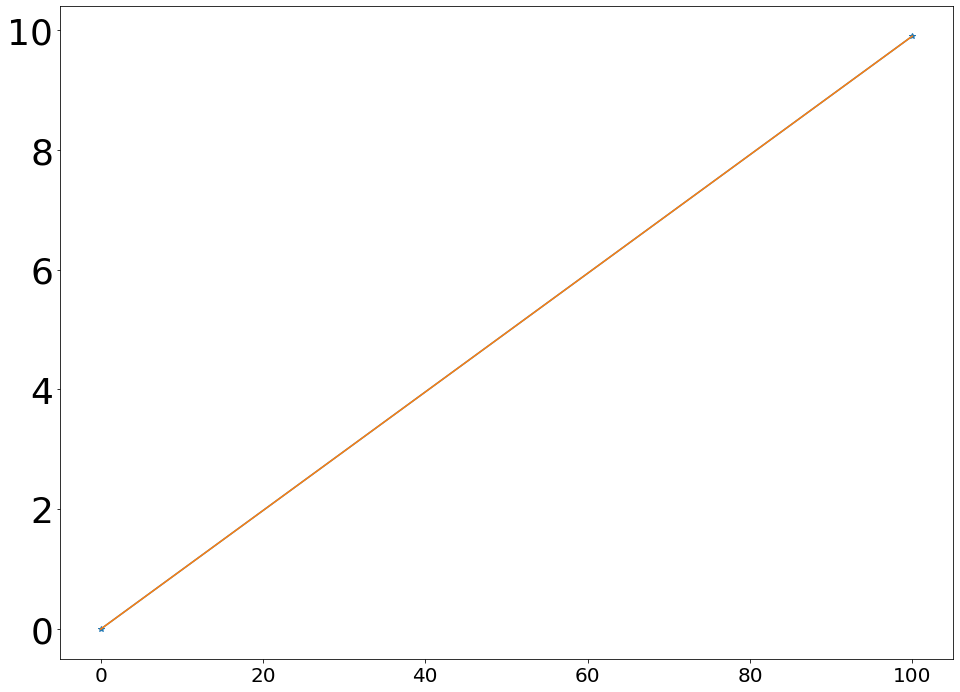

In [456]:
# save three values
## height_cal is the position of the bead in Aerotech coordinates
## z_distance transforms the cant_pos[2] voltage directly into um (using the vanilla calibration)
## z_distance_emp uses Akio's empirical data
df["height_cal"] = df['ewm_100'].apply(lambda element: element-attractor_0)
df["z_distance"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'])
df["z_distance_emp"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'],redo=True)


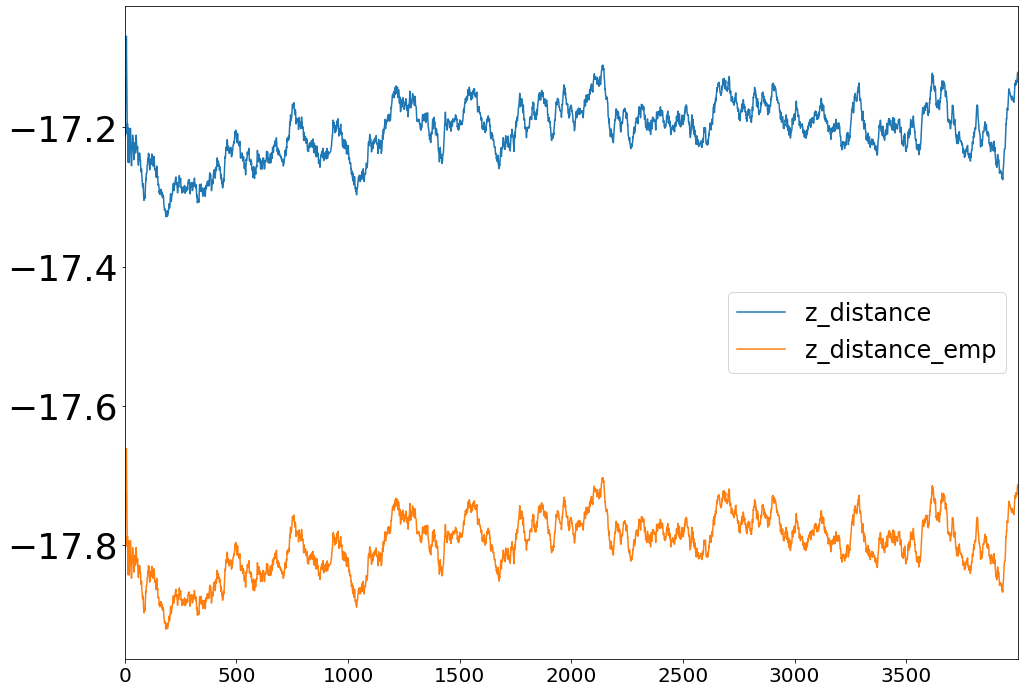

In [457]:
df.z_distance.plot()
df.z_distance_emp.plot()
plt.legend()

In [458]:
# assume for same year and same month, it can have multiple days. get those
dt.datetime.fromtimestamp(df["Time_Epoch"][0])
year = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).year
month = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).month
#months = []
#months = set(months)
days = []
days = set(days)
for i in range(len(df)):
    days.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).day)
    #months.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).month)
print(days)

{17, 18}


In [459]:
# prepare the files to match the time stamp to extract the environmental data
fn = []
for day in days:
    env_file = "/data/new_trap_processed/processed_files/{0}/Bead{1}/EnvData/{2}{3}{4}/environmental_data_{2}{3}{4}.pkl".format(bead_date,bead_number,year,str(month).zfill(2),str(day).zfill(2))
    fn.append(env_file)
print(fn)
    

['/data/new_trap_processed/processed_files/20200614/Bead1/EnvData/20200617/environmental_data_20200617.pkl', '/data/new_trap_processed/processed_files/20200614/Bead1/EnvData/20200618/environmental_data_20200618.pkl']


In [460]:
df_new = match_environmental_data(df,fn) # match the environmental data


100%|██████████| 4000/4000 [00:43<00:00, 92.89it/s] 

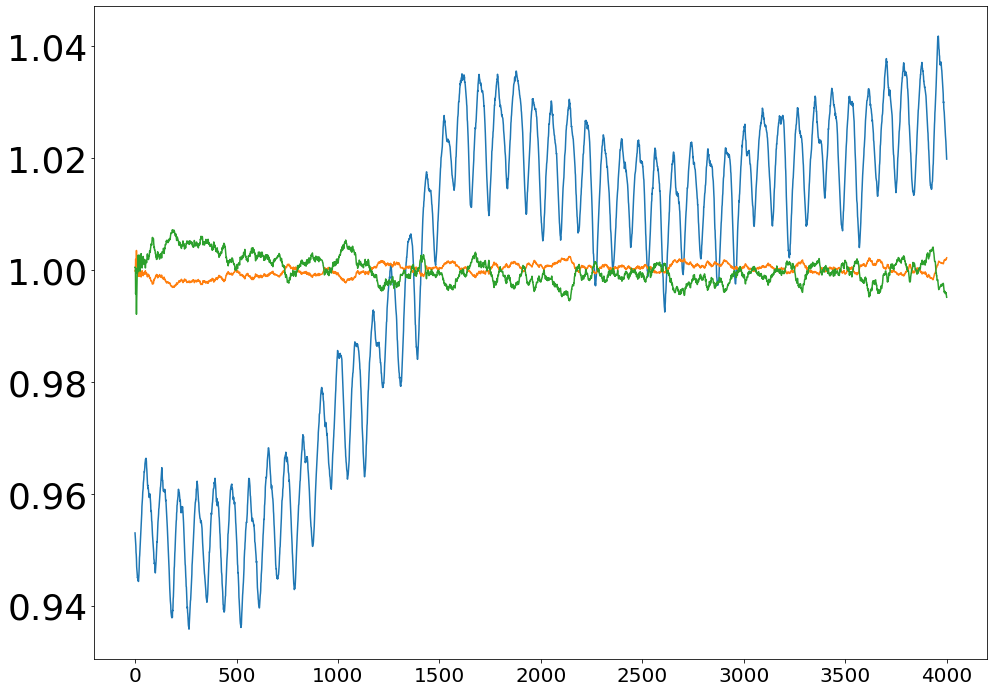

In [461]:
plt.plot(df_new.AirTemperature/df_new.AirTemperature.mean())
plt.plot(df_new.height_cal/df_new.height_cal.mean())
plt.plot(df_new.z_distance/df_new.z_distance.mean())
#plt.plot(df_new.z_distance_emp/df_new.z_distance_emp.mean())
#plt.xlim(0,1000)
plt.show()

In [462]:
df_new

,height_raw,y_pos_raw,mean_height,ewm_20,ewm_100,ewm_500,Time_Epoch,Attr_Pos_V,height_cal,z_distance,z_distance_emp,AirTemperature,SurfaceTemperature,Pressure
0,280.518812,32.491388,279.632798,279.632798,279.632798,279.632798,1.592452e+09,5.656346,39.350588,-17.212876,-17.805862,18.102706,17.719283,1030.061865
1,280.483784,32.667907,279.632798,279.632798,279.632798,279.632798,1.592452e+09,5.656333,39.350588,-17.212739,-17.805724,18.088223,17.720043,1030.061865
2,280.259339,32.263773,279.632798,279.632798,279.632798,279.632798,1.592453e+09,5.656356,39.350588,-17.212968,-17.805955,18.080682,17.719741,1030.061865
3,279.952861,32.082008,279.952861,279.725195,279.715230,279.713294,1.592453e+09,5.656376,39.433021,-17.130736,-17.723726,18.068931,17.717040,1030.061865
4,280.124064,31.419927,279.632798,279.702845,279.698077,279.697066,1.592453e+09,5.656374,39.415868,-17.147875,-17.740864,18.058336,17.718029,1030.061865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,279.802513,32.926227,279.802513,279.760691,279.713505,279.659600,1.592495e+09,5.656485,39.431296,-17.133558,-17.726557,19.431368,18.978163,1030.061865
3996,279.667356,33.267233,279.667356,279.751802,279.712591,279.659631,1.592495e+09,5.656524,39.430382,-17.134854,-17.727857,19.417979,18.976971,1030.061865
3997,279.985124,33.188577,279.985124,279.774023,279.717988,279.660930,1.592495e+09,5.656484,39.435779,-17.129058,-17.722058,19.407974,18.978184,1030.061865
3998,279.925741,33.069903,279.925741,279.788473,279.722102,279.661987,1.592495e+09,5.656458,39.439893,-17.124683,-17.717679,19.389735,18.978158,1030.061865


In [463]:
# save the file
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number

try:
    os.makedirs(base_proc+dataset)
    print("Created subdirs %s" %dataset)
except:
    print("Folder exists or you do not have permissions")
    
outputname = base_proc + dataset+FOI+"_aux.pkl"
if(os.path.isfile(outputname)==False):
    df_new.to_pickle(outputname)
    print("Successfully saved auxiliary file")
else:print("No auxiliary file produced. %s exists already!" %outputname)    

Folder exists or you do not have permissions
Successfully saved auxiliary file


In [464]:
del data # free the data

In [465]:
del df

In [466]:
del df_new